<a href="https://colab.research.google.com/github/Sayak769268/Sampling-/blob/main/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np

url = "https://github.com/AnjulaMehto/Sampling_Assignment/raw/main/Creditcard_data.csv"
df = pd.read_csv(url)


In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Columns in dataset:", df.columns)

X_train = df.drop('Class', axis=1)
y_train = df['Class']

smote_obj = SMOTE(random_state=42)
X_resampled, y_resampled = smote_obj.fit_resample(X_train, y_train)

df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

print("Class counts after applying SMOTE:", Counter(y_resampled))


Columns in dataset: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Class counts after applying SMOTE: Counter({0: 763, 1: 763})


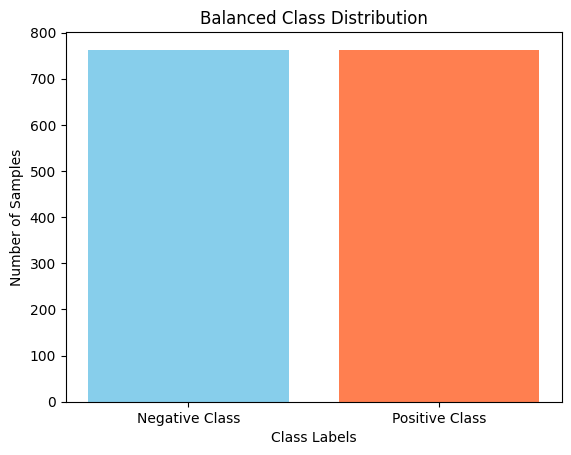

In [7]:
import matplotlib.pyplot as plt

class_counts = Counter(y_resampled)
plt.bar(['Negative Class', 'Positive Class'], [class_counts[0], class_counts[1]], color=['skyblue', 'coral'])

plt.title('Balanced Class Distribution')
plt.ylabel('Number of Samples')
plt.xlabel('Class Labels')
plt.show()


In [16]:
sample_size = int(len(X_resampled) * 0.1)
random_sample = X_resampled.sample(n=sample_size, random_state=42)
random_sample_labels = y_resampled.iloc[random_sample.index]

print(f"Randomly Selected Sample Shape: {random_sample.shape}")


Randomly Selected Sample Shape: (152, 30)


In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for _, test_idx in splitter.split(X_resampled, y_resampled):
    stratified_subset = X_resampled.iloc[test_idx]
    stratified_labels = y_resampled.iloc[test_idx]

print(f"Stratified Sample Shape: {stratified_subset.shape}")


Stratified Sample Shape: (153, 30)


In [18]:
step = 10
selected_indices = list(range(0, len(X_resampled), step))
systematic_subset = X_resampled.iloc[selected_indices]
systematic_labels = y_resampled.iloc[selected_indices]

print(f"Systematic Sample Shape: {systematic_subset.shape}")


Systematic Sample Shape: (153, 30)


In [19]:
clusters_list = np.array_split(X_resampled, 5)
chosen_cluster = np.random.randint(len(clusters_list))
cluster_subset = clusters_list[chosen_cluster]
cluster_labels = y_resampled.iloc[cluster_subset.index]

print(f"Cluster Sample Shape: {cluster_subset.shape}")


Cluster Sample Shape: (306, 30)


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
total_samples = len(X_resampled)
bootstrap_indices = np.random.choice(total_samples, size=total_samples, replace=True)
bootstrap_subset = X_resampled.iloc[bootstrap_indices]
bootstrap_labels = y_resampled.iloc[bootstrap_indices]

print(f"Bootstrap Sample Shape: {bootstrap_subset.shape}")


Bootstrap Sample Shape: (1526, 30)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import numpy as np

def assess_models(X_data, y_data):
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC(probability=True),
        'Decision Tree': DecisionTreeClassifier(),
        'K-Nearest Neighbors': KNeighborsClassifier()
    }

    sampling_types = ['Random Sampling', 'Systematic Sampling', 'Stratified Sampling', 'Cluster Sampling', 'Bootstrap Sampling']

    performance_results = {}

    for sampling_type in sampling_types:
        performance_results[sampling_type] = {}

        if sampling_type == 'Random Sampling':
            X_sample, y_sample = resample(X_data, y_data, random_state=42)

        elif sampling_type == 'Systematic Sampling':
            step_size = len(X_data) // len(y_data)
            X_sample, y_sample = X_data[::step_size], y_data[::step_size]

        elif sampling_type == 'Stratified Sampling':
            X_sample, y_sample = resample(X_data, y_data, stratify=y_data, random_state=42)

        elif sampling_type == 'Cluster Sampling':
            cluster_size = len(X_data) // 2
            X_sample, y_sample = X_data[:cluster_size], y_data[:cluster_size]

        elif sampling_type == 'Bootstrap Sampling':
            X_sample, y_sample = resample(X_data, y_data, random_state=42)

        for model_name, model in classifiers.items():
            model.fit(X_sample, y_sample)
            y_pred = model.predict(X_sample)

            accuracy = accuracy_score(y_sample, y_pred)
            precision = precision_score(y_sample, y_pred, average='binary', zero_division=0)
            recall = recall_score(y_sample, y_pred, average='binary', zero_division=0)
            f1 = f1_score(y_sample, y_pred, average='binary', zero_division=0)
            roc_auc = roc_auc_score(y_sample, model.predict_proba(X_sample)[:, 1]) if hasattr(model, "predict_proba") else 0.5

            performance_results[sampling_type][model_name] = {
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1,
                'ROC-AUC': roc_auc
            }

    return performance_results

evaluation_results = assess_models(X, y)

for sampling_type, models_performance in evaluation_results.items():
    print(f"\nEvaluating models on {sampling_type} data...\n")
    for model_name, metrics in models_performance.items():
        print(f"- {model_name} on {sampling_type}:")
        print(f"  * Accuracy: {metrics['Accuracy']:.4f}")
        print(f"  * Precision: {metrics['Precision']:.4f}")
        print(f"  * Recall: {metrics['Recall']:.4f}")
        print(f"  * F1-Score: {metrics['F1-Score']:.4f}")
        print(f"  * ROC-AUC: {metrics['ROC-AUC']:.4f}")

accuracies_summary = {sampling_type: {model_name: metrics['Accuracy'] for model_name, metrics in models_performance.items()} for sampling_type, models_performance in evaluation_results.items()}
print("\nModel accuracies for each sampling method:")
for sampling_type, accuracies in accuracies_summary.items():
    print(f"\n- {sampling_type}:")
    for model_name, accuracy in accuracies.items():
        print(f"  * {model_name}: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Evaluating models on Random Sampling data...

- Logistic Regression on Random Sampling:
  * Accuracy: 0.9832
  * Precision: 0.0000
  * Recall: 0.0000
  * F1-Score: 0.0000
  * ROC-AUC: 0.9053
- Random Forest on Random Sampling:
  * Accuracy: 1.0000
  * Precision: 1.0000
  * Recall: 1.0000
  * F1-Score: 1.0000
  * ROC-AUC: 1.0000
- Support Vector Machine on Random Sampling:
  * Accuracy: 0.9845
  * Precision: 0.0000
  * Recall: 0.0000
  * F1-Score: 0.0000
  * ROC-AUC: 0.9917
- Decision Tree on Random Sampling:
  * Accuracy: 1.0000
  * Precision: 1.0000
  * Recall: 1.0000
  * F1-Score: 1.0000
  * ROC-AUC: 1.0000
- K-Nearest Neighbors on Random Sampling:
  * Accuracy: 0.9896
  * Precision: 0.7500
  * Recall: 0.5000
  * F1-Score: 0.6000
  * ROC-AUC: 0.9957

Evaluating models on Systematic Sampling data...

- Logistic Regression on Systematic Sampling:
  * Accuracy: 0.9883
  * Precision: 0.5000
  * Recall: 0.1111
  * F1-Score: 0.1818
  * ROC-AUC: 0.8871
- Random Forest on Systematic Samplin

In [22]:
def determine_best_sampling(results):
    best_sampling_methods = {}
    for model_name in results['Random Sampling'].keys():
        highest_accuracy = -1
        optimal_sampling_method = ""

        for sampling_method, model_metrics in results.items():
            accuracy = model_metrics[model_name]['Accuracy']
            if accuracy > highest_accuracy:
                highest_accuracy = accuracy
                optimal_sampling_method = sampling_method

        best_sampling_methods[model_name] = (optimal_sampling_method, highest_accuracy)

    for model_name, (sampling_method, accuracy) in best_sampling_methods.items():
        print(f"Optimal sampling method for {model_name}: {sampling_method} with Accuracy: {accuracy:.4f}")

determine_best_sampling(results)


Optimal sampling method for Logistic Regression: Cluster Sampling with Accuracy: 0.9922
Optimal sampling method for Random Forest: Random Sampling with Accuracy: 1.0000
Optimal sampling method for SVM: Cluster Sampling with Accuracy: 0.9922
Optimal sampling method for Decision Tree: Random Sampling with Accuracy: 1.0000
Optimal sampling method for K-Nearest Neighbors: Stratified Sampling with Accuracy: 0.9922
